In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import math

#import cv2
import pims
from PIL import Image

import skimage

import json

#own modules / functions
import sys

pythonPackagePath = "/Users/johannesschoeneberg/git/pyLattice/src/python/"
sys.path.append(pythonPackagePath+"/modules")
import TiffProcessing as tiffproc
import InputProcessing as inproc
sys.path.append(pythonPackagePath+"/classes")
import Track

In [2]:
inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data/_inputParameters.csv',names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")

trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))


print(framerate_msec)



5689.0


In [4]:
path = outputDataFolder+'/'+master_outputDataFolder+'/'
#path = "/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_560/"
filename = "puncta_01.csv"
data = pd.read_csv(path+"/"+filename,header=0)
data.columns = ["x","y","z","A"]
print(len(data))
data[0:5]

1085


,x,y,z,A
0,256.7610,375.1010,38.10001,13110.04
1,271.0362,408.1334,38.37845,10152.52
2,250.8326,363.8898,39.37858,17049.97
3,286.0061,401.4747,38.60983,15408.62
4,216.6535,373.1641,41.87062,11407.09


In [5]:
data.iloc[0].values

array([   256.761  ,    375.101  ,     38.10001,  13110.04   ])

In [6]:
file = open('puncta_1.bild','w') 
radius = 1
#.transparency value 
file.write(".transparency 0.5\n")
file.write(".color red\n")
file.write(".dot 0 0 0\n")
#Set the transparency of subsequently defined items. The value can range from 0.0 (not transparent) to 1.0 (completely transparent).
for i in range(0,len(data)):
    dataLine = data.iloc[i].values
    line = ".sphere "+str(dataLine[0])+" "+str(dataLine[1])+" "+str(dataLine[2])+" "+str(radius)+"\n"
    file.write(line)
file.close()

[ 9.48113363  9.22547723  9.74390372 ...,  9.69800831  9.67421715
  9.67084591]
1085


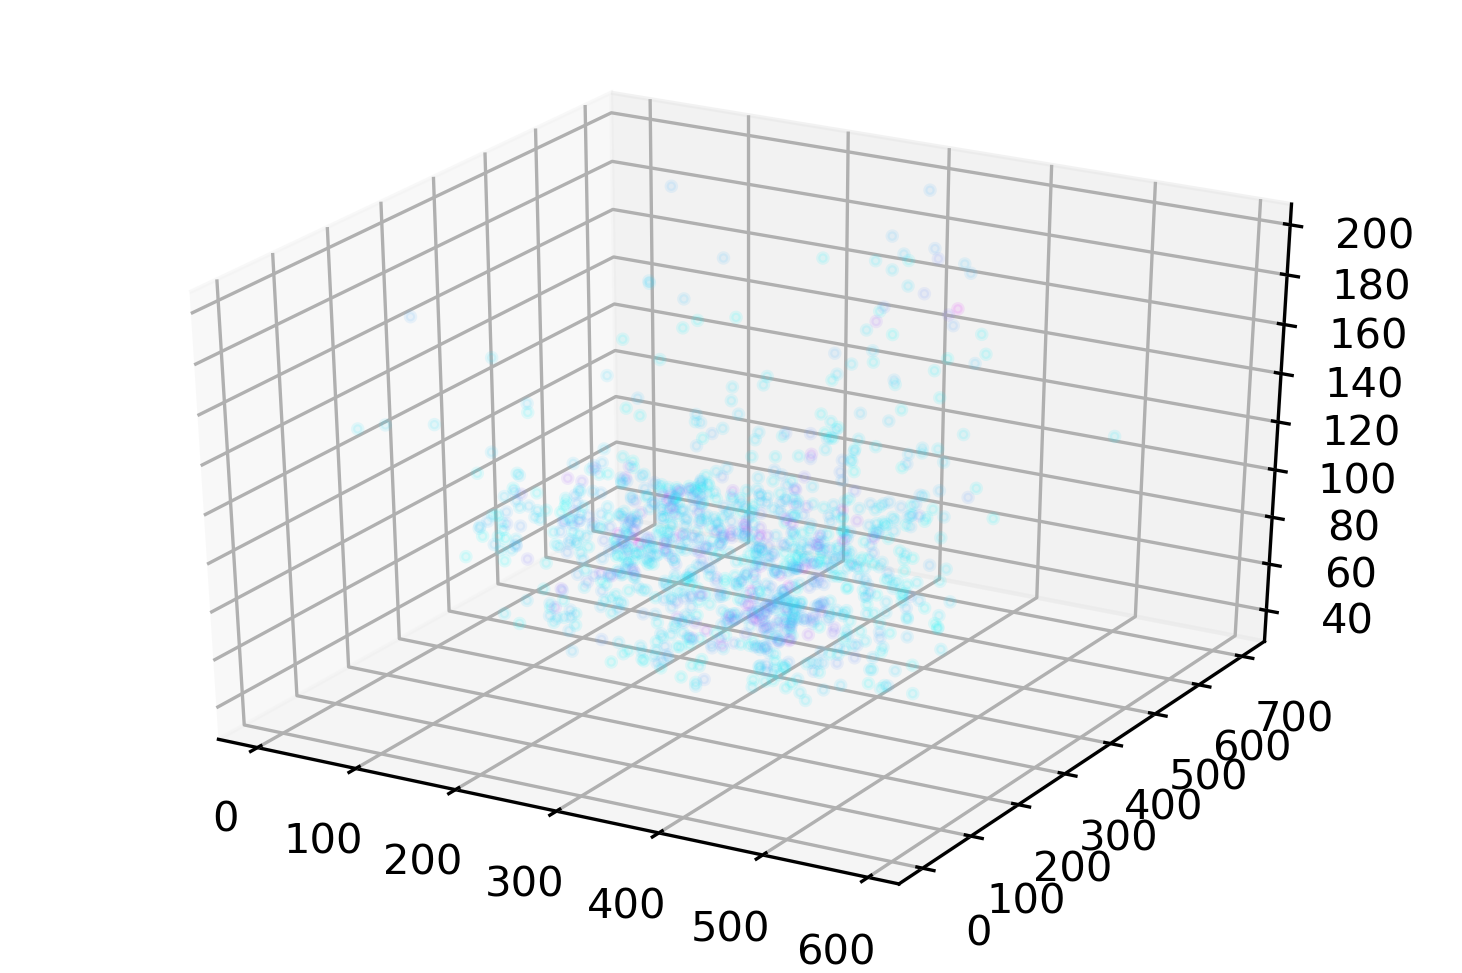

In [7]:
    plt.figure(dpi=300)
    ax = plt.axes(projection='3d')
#    plt.title(title)
    # Data for a three-dimensional line
    x = data['x'].values[0:100000]
    y = data['y'].values[0:100000]
    z = data['z'].values[0:100000]
    intensity = data['A'].values[0:100000]
    print(np.log(intensity))
    print(len(intensity))
#    ax.plot3D(x, y, z, 'gray')
    ax.scatter3D(x, y, z, c=np.log(intensity), cmap='cool',alpha=0.1,s=5);

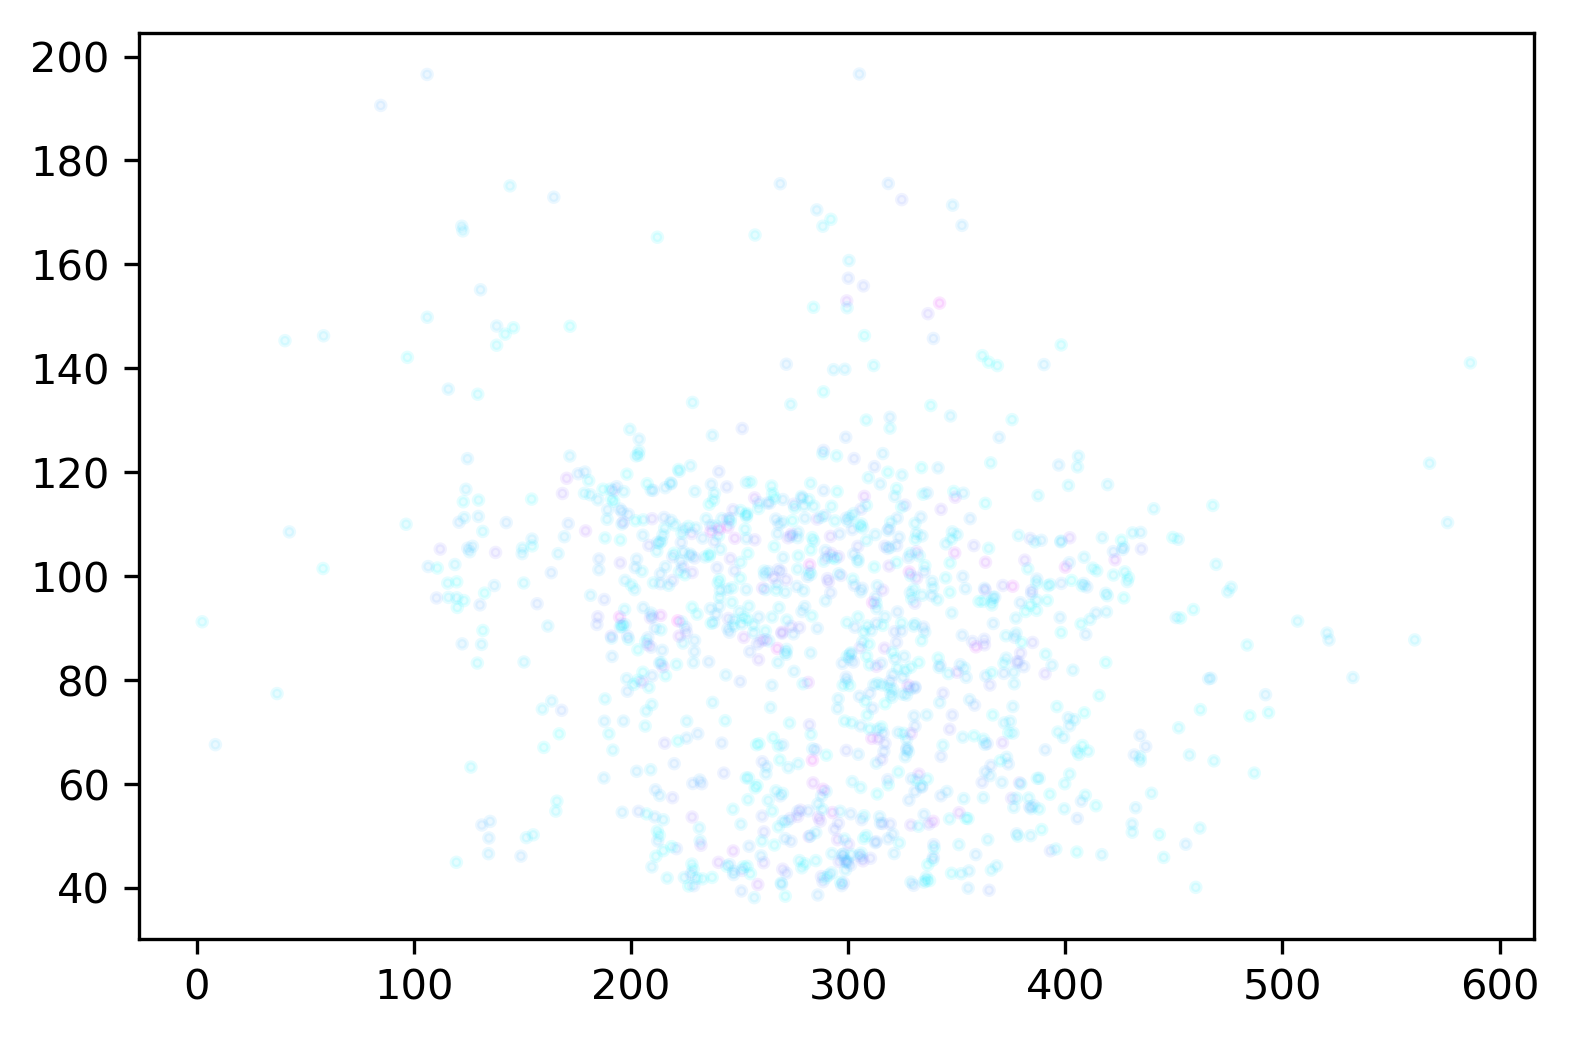

In [8]:
    plt.figure(dpi=300)
    ax = plt.axes()
#    plt.title(title)
    # Data for a three-dimensional line
    x = data['x'].values[0:100000]
    y = data['y'].values[0:100000]
    z = data['z'].values[0:100000]
    intensity = data['A'].values[0:100000]
#    ax.plot3D(x, y, z, 'gray')
#    ax.scatter(x, y, c=intensity, cmap='cool',alpha=0.1,s=1);
    ax.scatter(x, z, c=np.log(intensity), cmap='cool',alpha=0.1,s=5);

1085


Text(0,0.5,'z')

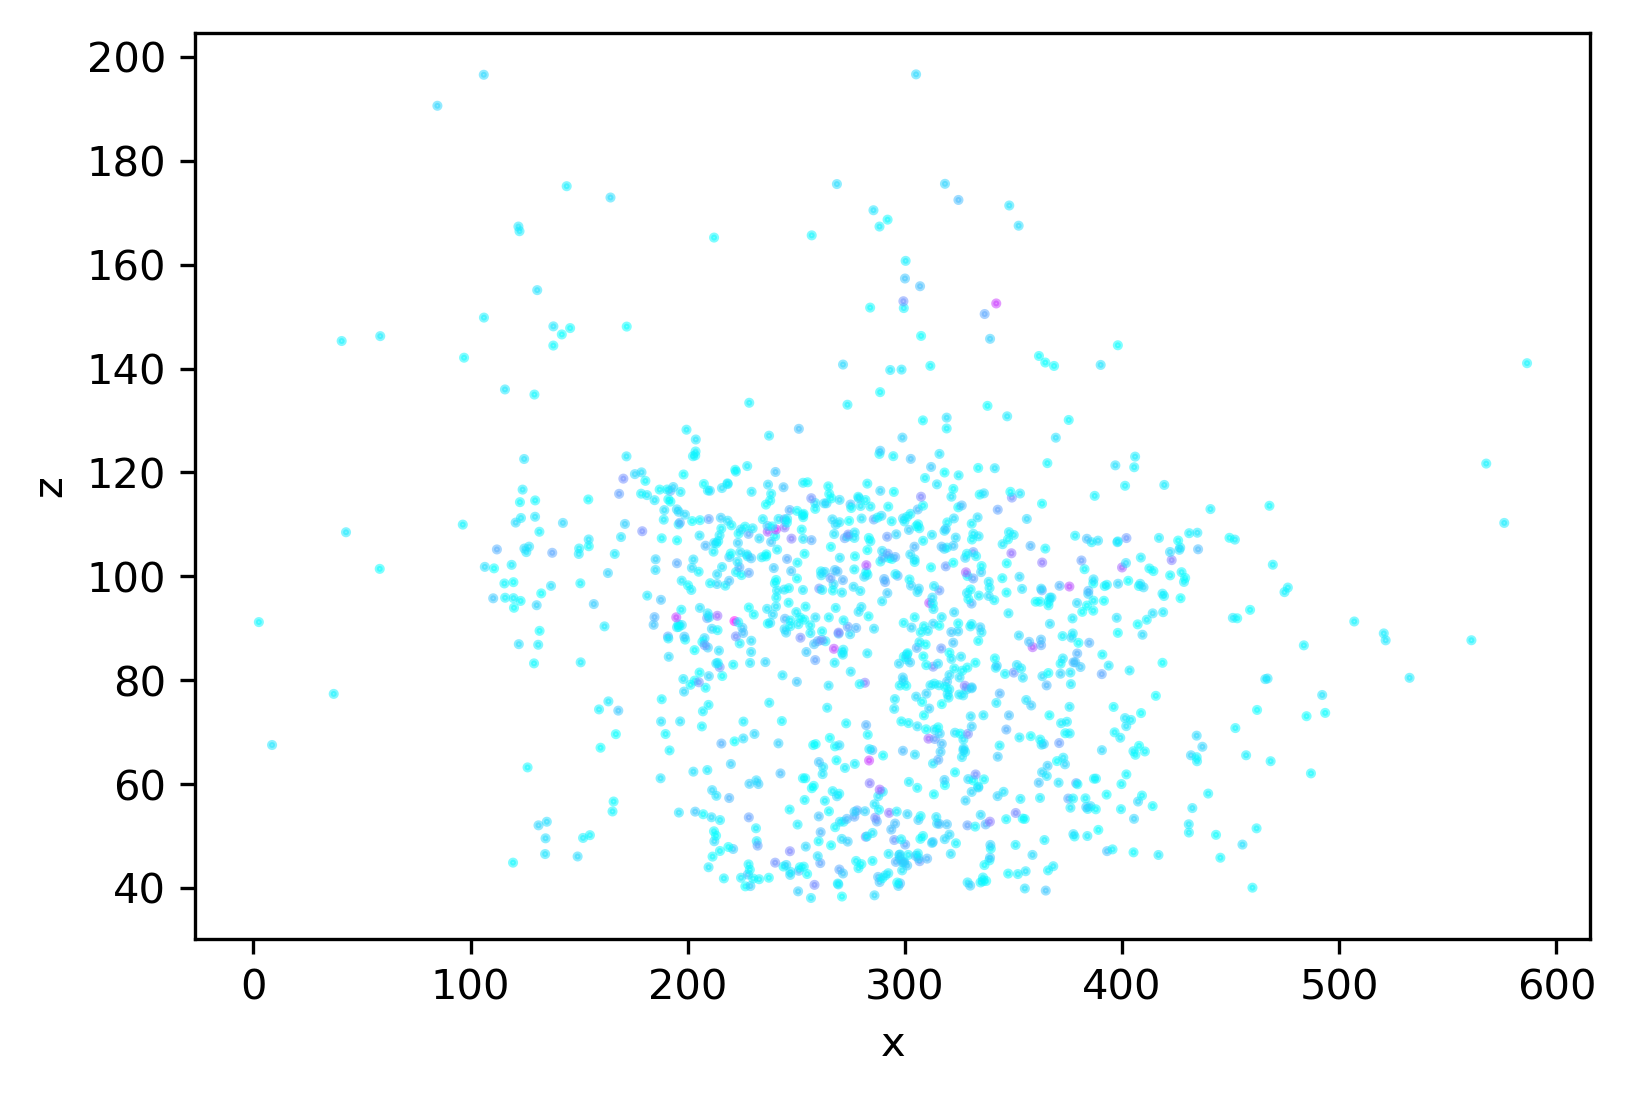

In [9]:
#%matplotlib notebook

idx = data.index[data['A'] > 10000]
print(len(idx))


#df.loc[idx]

plt.figure(dpi=300)
#ax = plt.axes()
#    plt.title(title)
    # Data for a three-dimensional line
x = ((data['x']).loc[idx])
y = ((data['y']).loc[idx])
z = ((data['z']).loc[idx])
intensity = ((data['A']).loc[idx])
#    y = data['y'].values[0:100000]
#    z = data['z'].values[0:100000]
#    intensity = data['A'].values[0:100000]
#    ax.plot3D(x, y, z, 'gray')
plt.scatter(x, z, c=intensity, cmap='cool',alpha=0.5,s=2);
plt.xlabel("x")
plt.ylabel("z")
#plt.ylim(0,200)




Text(0,0.5,'y')

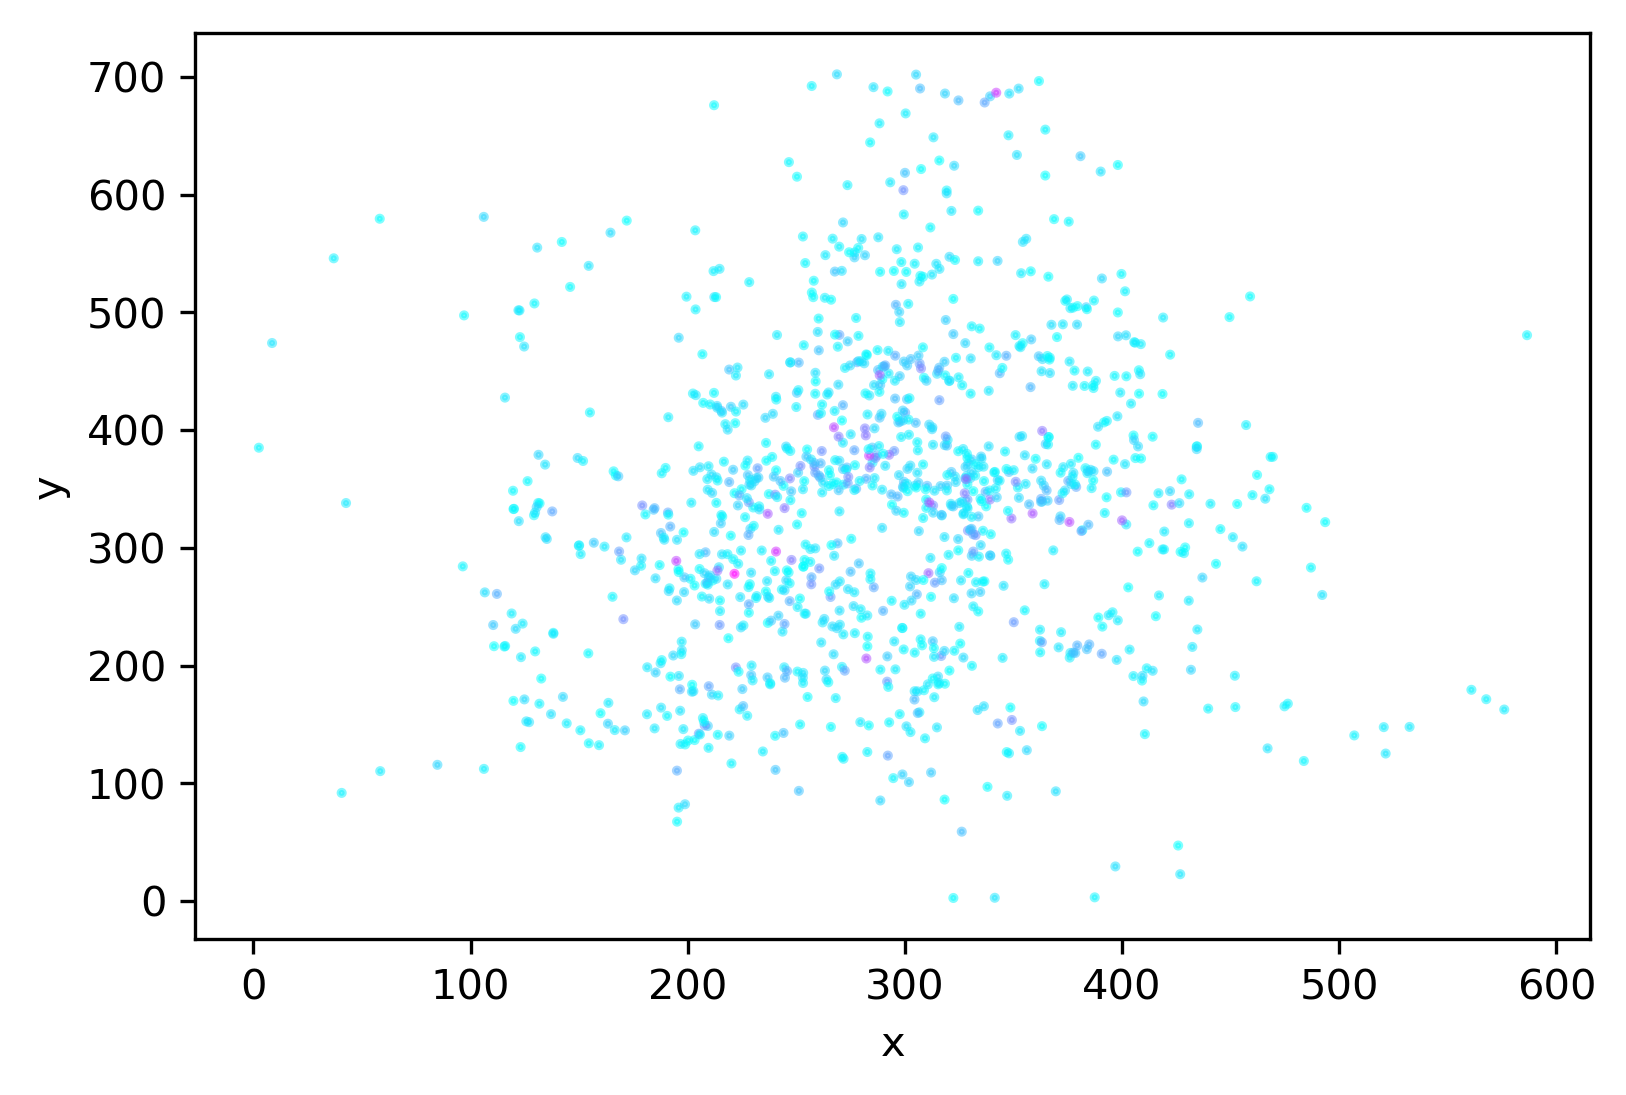

In [10]:
#%matplotlib notebook

idx = data.index[data['A'] > 1]


#df.loc[idx]

plt.figure(dpi=300)
#ax = plt.axes()
#    plt.title(title)
    # Data for a three-dimensional line
x = ((data['x']).loc[idx])
y = ((data['y']).loc[idx])
z = ((data['z']).loc[idx])
intensity = ((data['A']).loc[idx])
#    y = data['y'].values[0:100000]
#    z = data['z'].values[0:100000]
#    intensity = data['A'].values[0:100000]
#    ax.plot3D(x, y, z, 'gray')
plt.scatter(x, y, c=intensity, cmap='cool',alpha=0.5,s=2);
plt.xlabel("x")
plt.ylabel("y")
#plt.ylim(0,200)



3000 3000
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999],
           dtype='int64', length=3000)


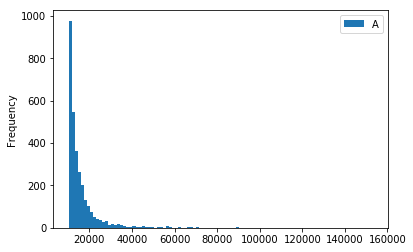

In [53]:
data[['A']].plot.hist(bins=100)
print(len(data['A']),len(idx))
print(idx)